In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
dados = pd.read_csv('../dados/data_arrhythmia.csv', sep=';')
pd.set_option('display.max_columns', None)

In [67]:
dados

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,AV,AY,AZ,AB',BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BR,BS,BT,BU,BV,BY,BZ,CA,CB,CC,CD,CE,Cf,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CR,CS,CT,CU,CV,CY,CZ,DA,DB,DC,DD,DE,DF,DG,DH,DI,DJ,DK,DL,DM,DN,DO,DP,DR,DS,DT,DU,DV,DY,DZ,EA,EB,EC,ED,EF,EG,EH,EI,EJ,EK,EL,EM,EN,EO,EP,ER,ES,ET,EU,EV,EY,EZ,FA,FB,FC,FD,FE,FF,FG,FH,FI,FJ,FK,FL,FM,FN,FO,FP,FR,FS,FT,FU,FV,FY,FZ,GA,GB,GC,GD,GE,GF,GG,GH,GI,GJ,GK,GL,GM,GN,GO,GP,GR,GS,GT,GU,GV,GY,GZ,HA,HB,HC,HD,HE,HF,HG,HH,HI,HJ,HK,HL,HM,HN,HO,HP,HR,HS,HT,HU,HV,HY,HZ,IA,IB,IC,ID,IE,IF,IG,IH,II,IJ,IK,IL,IM,IN,IO,IP,IR,IS,IT,IU,IV,IY,IZ,JA,JB,JC,JD,JE,JF,JG,JH,JI,JJ,JK,JL,JM,JN,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,52,40,0,0,32,0,0,0,0,0,0,0,56,48,0,0,36,0,0,0,0,0,0,0,60,48,0,0,36,0,0,0,0,0,0,0,64,40,0,0,40,0,0,0,0

## Excluindo Colunas inúteis

As colunas nomeadas com de 'AA' até 'LG' serão excluídas por não ter significado real encontrado. Se o algoritmo de classificação obtiver baixa acurácia podemos resgatar essas colunas e testar o modelo utilizando-as.

In [68]:
dados.drop(dados.columns[20:279], axis=1, inplace=True)

In [69]:
dados

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63,0,52,24,0,0,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,0,44,36,0,0,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,16,40,40,0,0,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,0,56,0,0,0,1


## Estatísticas Descritivas

In [70]:
dados.describe().round(2)

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
count,452.00,452.00,452.00,452.00,452.00,452.00,452.00,452.00,452.00,452.00,452.00,452.00,452.00,452.00,452.0,452.00
mean,46.47,0.55,166.19,68.17,88.92,155.15,367.21,169.95,90.00,33.68,5.63,51.63,20.92,0.14,0.0,3.88
std,16.47,0.50,37.17,16.59,15.36,44.84,33.39,35.63,25.83,45.43,10.65,18.25,20.54,1.57,0.0,4.41
min,0.00,0.00,105.00,6.00,55.00,0.00,232.00,108.00,0.00,-172.00,0.00,0.00,0.00,0.00,0.0,1.00
25%,36.00,0.00,160.00,59.00,80.00,142.00,350.00,148.00,79.00,3.75,0.00,40.00,0.00,0.00,0.0,1.00
50%,47.00,1.00,164.00,68.00,86.00,157.00,367.00,162.00,91.00,40.00,0.00,48.00,20.00,0.00,0.0,1.00
75%,58.00,1.00,170.00,79.00,94.00,175.00,384.00,179.00,102.00,66.00,12.00,60.00,36.00,0.00,0.0,6.00
max,83.00,1.00,780.00,176.00,188.00,524.00,509.00,381.00,205.00,169.00,88.00,156.00,88.00,24.00,0.0,16.00


Olhando mais precisamente para a altura

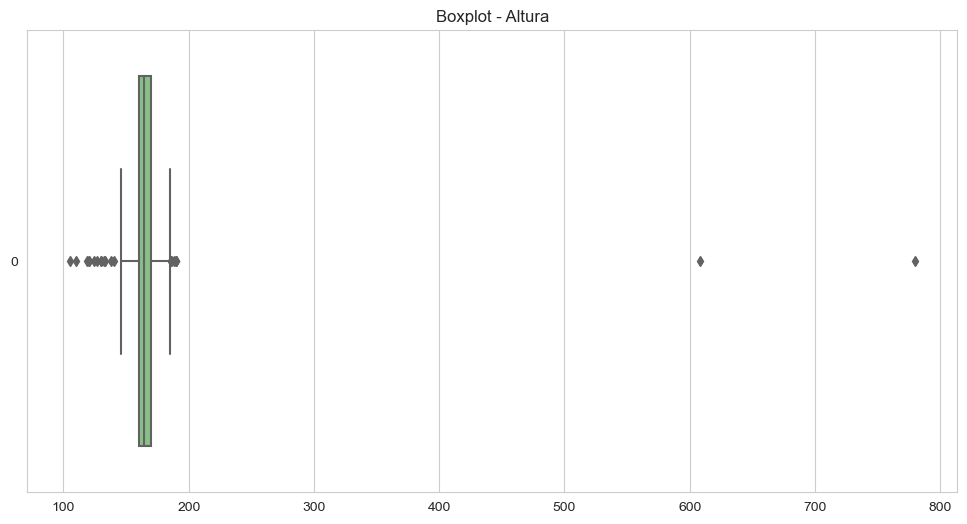

In [71]:
ax = sns.boxplot(dados['height'], orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot - Altura')

sns.set_palette("Accent")
sns.set_style("whitegrid")


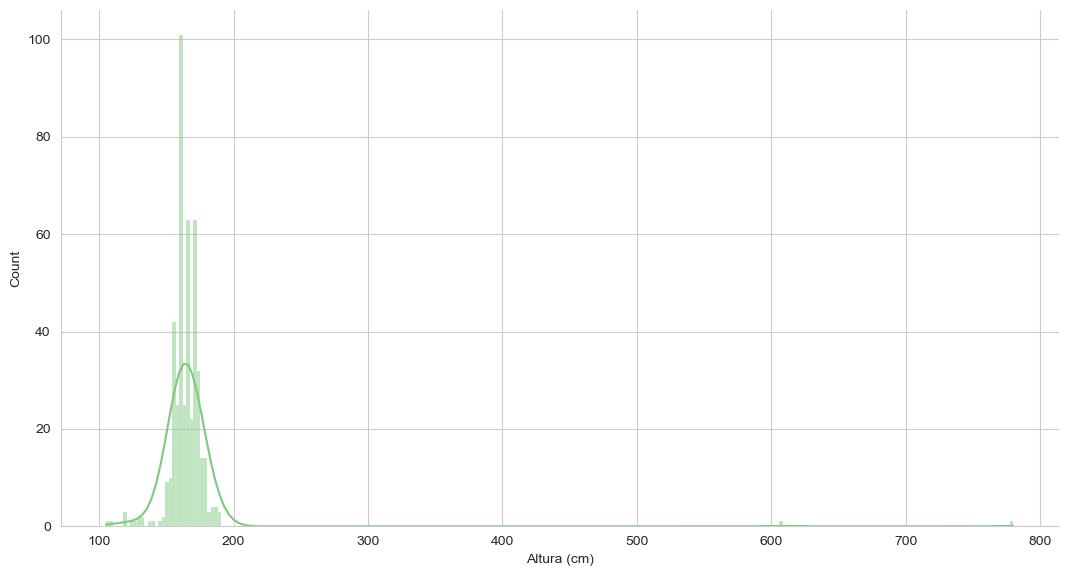

In [72]:
ax = sns.displot(dados['height'], kde=True)
ax.figure.set_size_inches(12, 6)
plt.xlabel('Altura (cm)')
sns.set_palette("Accent")
sns.set_style("whitegrid")

Verificando Outliers:

In [73]:
intervalo_quartilico = dados.height.quantile(0.75) - dados.height.quantile(0.25)
out_higher = dados.height.quantile(0.75) + 1.5*intervalo_quartilico 
out_lower = dados.height.quantile(0.25) - 1.5*intervalo_quartilico 
dados.query(f"height > {out_higher}" or f"height < {out_lower}")

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,8
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,7
126,58,0,186,18,87,166,372,150,96,-1,63,39,17,?,70,24,44,0,0,0,1
141,1,1,780,6,85,165,237,150,106,88,30,30,52,?,138,0,28,28,0,0,5
316,0,0,608,10,83,126,232,128,60,125,21,-50,102,?,163,0,20,48,0,0,5
332,42,0,188,91,113,213,358,220,107,91,39,84,79,?,78,0,40,48,0,0,16
346,20,0,186,66,95,123,378,161,81,58,18,67,43,?,57,20,40,44,0,0,10
423,51,0,186,95,94,203,367,171,106,-7,57,61,32,?,71,0,80,0,0,0,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,0,44,36,0,0,10


Olhando mais cuidadosamente os dados sobre altura que estão fora do padrão, verificamos que algum os mais altos (780 e 608)
na verdade pertencem a bebês e foram erroneamente no dataframe. Para consetar isso vamos dividir esses dois valores por 10.

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
dados.loc[141].height = dados.loc[141].height/10
dados.loc[316].height = dados.loc[316].height/10

In [76]:
intervalo_quartilico = dados.height.quantile(0.75) - dados.height.quantile(0.25)
out_higher = dados.height.quantile(0.75) + 1.5*intervalo_quartilico 
out_lower = dados.height.quantile(0.25) - 1.5*intervalo_quartilico 
dados.query(f"height > {out_higher}" or f"height < {out_lower}")

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,8
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,7
126,58,0,186,18,87,166,372,150,96,-1,63,39,17,?,70,24,44,0,0,0,1
141,1,1,780,6,85,165,237,150,106,88,30,30,52,?,138,0,28,28,0,0,5
316,0,0,608,10,83,126,232,128,60,125,21,-50,102,?,163,0,20,48,0,0,5
332,42,0,188,91,113,213,358,220,107,91,39,84,79,?,78,0,40,48,0,0,16
346,20,0,186,66,95,123,378,161,81,58,18,67,43,?,57,20,40,44,0,0,10
423,51,0,186,95,94,203,367,171,106,-7,57,61,32,?,71,0,80,0,0,0,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,0,44,36,0,0,10


Problema da altura resolvido!

Verificando coluna 'J'

In [77]:
dados.query("J == '?'")

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,6
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,7
5,13,0,169,51,100,167,321,174,91,107,66,52,88,?,84,0,36,48,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,45,0,175,75,91,134,376,160,83,91,68,31,80,?,70,0,32,32,0,0,1
446,20,1,157,57,81,151,363,166,80,43,42,72,42,?,75,0,48,0,0,0,1
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63,0,52,24,0,0,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,0,44,36,0,0,10


Excluindo ponto J por possuir poucos valores.

In [78]:
dados.drop(['J'], axis=1, inplace=True)

Verficando demais colunas

In [91]:
dados

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,63,0,52,44,0,0,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,75,0,40,80,0,0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,71,0,72,20,0,0,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,0,48,40,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,63,0,52,24,0,0,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,73,0,44,36,0,0,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,16,40,40,0,0,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,80,0,56,0,0,0,1


In [90]:
dados.query("heart_rate == '?'")

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,0,48,40,0,0,7


In [93]:
dados = dados.drop(4)

In [96]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 451
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           451 non-null    int64 
 1   sex           451 non-null    int64 
 2   height        451 non-null    int64 
 3   weight        451 non-null    int64 
 4   qrs_duration  451 non-null    int64 
 5   p-r_interval  451 non-null    int64 
 6   q-t_interval  451 non-null    int64 
 7   t_interval    451 non-null    int64 
 8   p_interval    451 non-null    int64 
 9   qrs           451 non-null    int64 
 10  T             451 non-null    object
 11  P             451 non-null    object
 12  QRST          451 non-null    object
 13  heart_rate    451 non-null    object
 14  q_wave        451 non-null    int64 
 15  r_wave        451 non-null    int64 
 16  s_wave        451 non-null    int64 
 17  R'_wave       451 non-null    int64 
 18  S'_wave       451 non-null    int64 
 19  diagnosi

In [105]:
dados['T'].unique()

array(['13', '37', '34', '11', '66', '49', '7', '69', '71', '42', '51',
       '20', '45', '75', '-24', '28', '39', '78', '56', '10', '17', '112',
       '52', '48', '153', '172', '16', '32', '46', '23', '35', '3', '-8',
       '-5', '4', '60', '8', '-18', '76', '64', '9', '79', '33', '14',
       '30', '53', '25', '62', '?', '43', '31', '19', '50', '68', '-164',
       '-56', '15', '-2', '87', '-136', '175', '-124', '142', '-13', '-9',
       '58', '47', '-165', '73', '21', '38', '70', '-92', '143', '22',
       '72', '57', '41', '65', '36', '63', '55', '44', '77', '24', '81',
       '12', '29', '18', '40', '54', '-1', '104', '-167', '-15', '67',
       '108', '-75', '160', '114', '-22', '120', '-115', '147', '-82',
       '-63', '-172', '102', '179', '86', '-52', '-49', '174', '-27',
       '95', '-123', '61', '137', '164', '5', '-177', '-103', '-106',
       '-42', '117', '127', '-160', '122', '59', '-16', '26', '100', '0',
       '-21', '-121', '-174', '-51', '105', '-116', '-4', '

In [125]:
# 9 DADOS FALTANTES 
dados.query("T == '?'")

,age,sex,height,weight,qrs_duration,p_r_interval,q_t_interval,t_interval,p_interval,qrs,T,P,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
66,54,1,160,63,82,158,410,141,87,25,?,62,39,54,0,48,0,0,0,2
91,64,1,155,88,82,194,342,138,126,-4,?,64,-1,85,0,76,0,0,0,4
200,70,1,160,90,76,187,396,155,121,-1,?,30,2,89,0,44,36,0,0,2
212,63,0,174,79,91,151,410,198,86,16,?,2,16,59,0,48,40,0,0,2
238,56,0,170,80,81,162,352,154,100,23,?,56,20,79,0,68,0,0,0,1
360,62,1,157,65,81,174,452,160,116,53,?,42,53,87,0,60,0,0,0,2
372,48,0,182,77,77,196,325,235,104,46,?,56,44,89,0,48,32,0,0,2
412,41,0,170,67,96,191,368,202,108,62,?,-52,62,63,0,68,0,0,0,16


In [128]:
# 22 DADOS FALTANTES
dados.query("P == '?'")

,age,sex,height,weight,qrs_duration,p_r_interval,q_t_interval,t_interval,p_interval,qrs,T,P,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,diagnosis
54,52,0,165,80,88,202,369,113,97,58,79,?,62,59,16,44,40,0,0,16
59,32,1,160,58,83,122,386,174,54,81,53,?,76,66,16,36,40,0,0,1
106,46,0,165,55,82,0,415,108,0,-1,70,?,12,63,0,72,0,0,0,6
108,17,0,170,61,97,0,353,141,0,90,-92,?,92,86,0,44,48,0,0,2
116,74,0,172,74,106,165,411,161,96,55,23,?,42,61,0,40,12,24,0,16
133,46,0,177,90,100,259,380,179,95,82,32,?,53,63,16,36,36,0,0,1
174,55,1,156,78,88,0,380,138,0,79,73,?,76,71,0,44,44,0,0,15
177,27,1,155,55,77,205,345,144,149,66,19,?,49,67,0,40,40,0,0,1
193,36,1,172,81,87,145,347,207,79,47,-82,?,19,84,0,48,20,12,0,2
204,33,0,168,105,99,136,349,245,81,94,102,?,96,70,44,36,0,0,0,3


In [145]:
# 1 DADO FALTANTE
dados.query("QRST == '?'")

,age,sex,height,weight,qrs_duration,p_r_interval,q_t_interval,t_interval,p_interval,qrs,T,P,QRST,heart_rate,q_wave,r_wave,s_wave,R_wave,S_wave,diagnosis
241,62,1,155,78,90,172,297,209,103,2,-177,26,?,89,0,56,0,0,0,1


In [135]:
dados.rename(columns = {"R'_wave": "R_wave", "S'_wave": "S_wave"}, inplace=True)

Excluindo Linhas com dados faltantes em QRST, T e P

In [153]:
dados = dados.drop(dados.query("P == '?'").index)
dados = dados.drop(dados.query("T == '?'").index)
dados = dados.drop(dados.query("QRST == '?'").index)

In [154]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 451
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           420 non-null    int64 
 1   sex           420 non-null    int64 
 2   height        420 non-null    int64 
 3   weight        420 non-null    int64 
 4   qrs_duration  420 non-null    int64 
 5   p_r_interval  420 non-null    int64 
 6   q_t_interval  420 non-null    int64 
 7   t_interval    420 non-null    int64 
 8   p_interval    420 non-null    int64 
 9   qrs           420 non-null    int64 
 10  T             420 non-null    object
 11  P             420 non-null    object
 12  QRST          420 non-null    object
 13  heart_rate    420 non-null    object
 14  q_wave        420 non-null    int64 
 15  r_wave        420 non-null    int64 
 16  s_wave        420 non-null    int64 
 17  R_wave        420 non-null    int64 
 18  S_wave        420 non-null    int64 
 19  diagnosi

## Frequências da variável alvo (diagnosis):


In [155]:
frequences = pd.value_counts(dados.diagnosis)
percentual = pd.value_counts(dados.diagnosis, normalize=True) * 100
df = pd.DataFrame({'Frequências': frequences, 'Percentual': percentual})

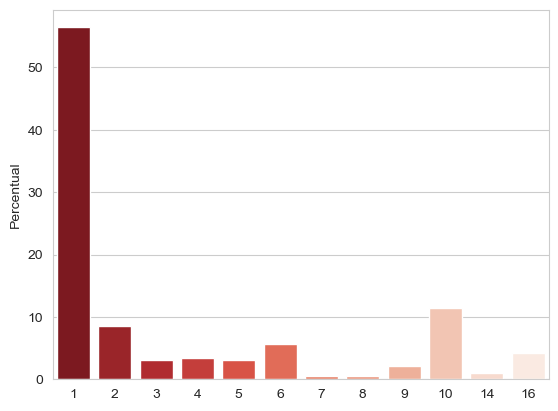

In [156]:
ax = sns.barplot(data=df, x = df.index, y = 'Percentual', palette='Reds_r')

Legenda:
    
1: normal <br>
2: Alterações isquêmicas (Doença Arterial Coronariana) <br>
3: Infarto do Miocárdio Anterior Antigo <br>
4: Infarto do Miocárdio Inferior Antigo <br>
5: Taquicardia sinusal <br>
6: Bradicardia sinusal <br>
7: Contração Ventricular Prematura (PVC) <br>
8: Contração Prematura Supraventricular <br>
9: Bloqueio de ramo esquerdo <br>
10: Bloqueio de ramo direito <br>
11: 1. grau de bloqueio atrioventricular <br>
12: Bloqueio AV de 2 graus <br>
13: Bloqueio AV de 3 graus <br>
14: Hipertrofia do ventrículo esquerdo <br>
15: Fibrilação ou Flutter Atrial <br>
16: Outros <br>

## Salvando Dataset tratado.

In [157]:
dados.to_csv('../dados/dados_tratado.csv', index=False)